In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time





# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)


data = pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASETS MODIFICADOS\df_modificado_final_eda.xlsx")

In [39]:
data.head(1)

,Anyo,Fecha,Hora,Hora_entera,Intervalo,IP Origen,Destino IP,Datos_geolocalizacion,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Cluster,Etiqueta,Indicadores_malware,Puntuaciones_anomalias,Informacion_usuario,Informacion_dispositivo
0,2023,2023-05-30,2023-12-25 06:33:58,6,6-9,103.216.15.12,84.9.164.252,"Jamshedpur, Sikkim",Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",0.067699,anómala,IoC Detected,2867,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...


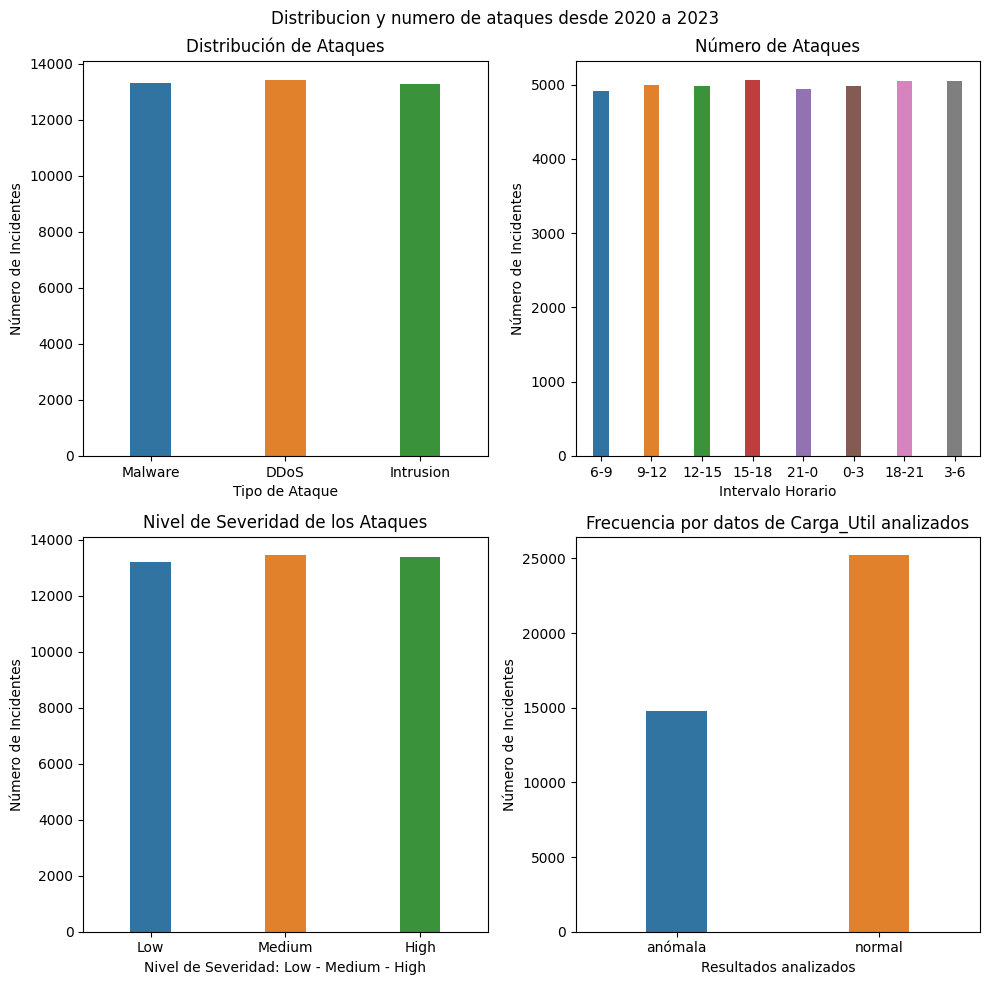

In [5]:
#creo la figura
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.suptitle("Distribucion y numero de ataques desde 2020 a 2023")
axs = axs.flatten()

# Ajuste del ancho de las barras
bar_width = 0.3

# Distribución de Ataques
sns.countplot(x='Tipo_ataque', data=data, ax=axs[0], width=bar_width)
axs[0].set_title('Distribución de Ataques')
axs[0].set_xlabel('Tipo de Ataque')
axs[0].set_ylabel('Número de Incidentes')

# Análisis Temporal
sns.countplot(x='Intervalo', data=data, ax=axs[1],width=bar_width)
axs[1].set_title('Número de Ataques')
axs[1].set_xlabel('Intervalo Horario')
axs[1].set_ylabel('Número de Incidentes')

# Consecuencias y Respuestas
sns.countplot(x='Nivel_severidad', data=data, ax=axs[2],width=bar_width)
axs[2].set_title('Nivel de Severidad de los Ataques')
axs[2].set_xlabel('Nivel de Severidad: Low - Medium - High')
axs[2].set_ylabel('Número de Incidentes')

# Frecuencia de Protocolos
sns.countplot(x='Etiqueta', data=data, ax=axs[3],width=bar_width)
axs[3].set_title('Frecuencia por datos de Carga_Util analizados')
axs[3].set_xlabel('Resultados analizados')
axs[3].set_ylabel('Número de Incidentes')





# Mostrar la gráfica
plt.tight_layout()
plt.show()

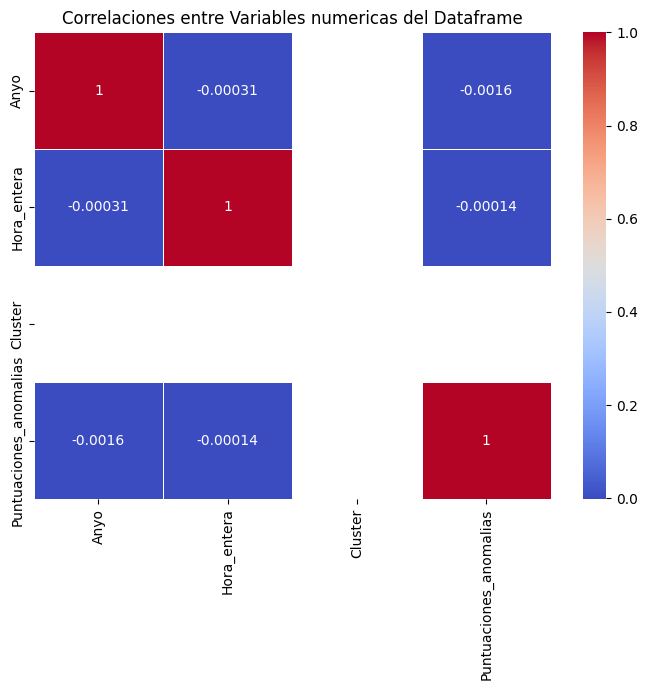

In [7]:

# Correlaciones y Relaciones

# Seleccionar solo las columnas numéricas
columnas_numericas = data.select_dtypes(include='number')
plt.figure(figsize= (7,7), edgecolor="b")
sns.heatmap(columnas_numericas.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlaciones entre Variables numericas del Dataframe')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


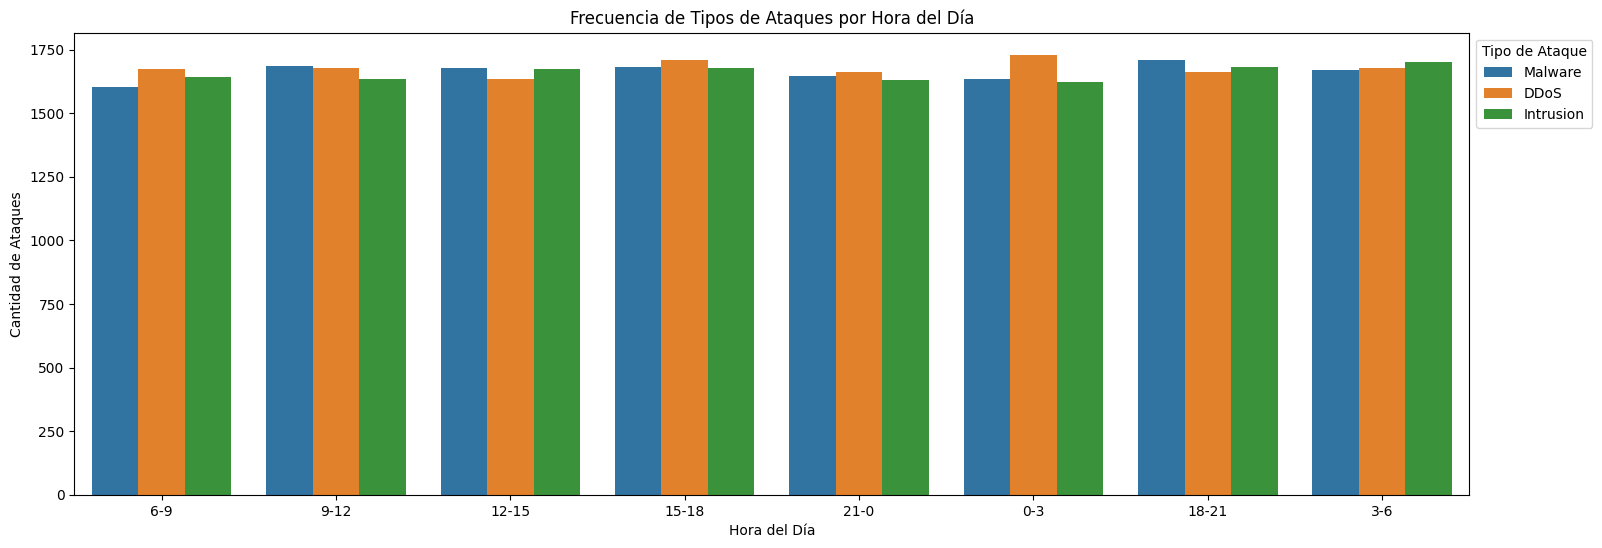

In [9]:
##Análisis de tipo de ataque:


# Gráfico de barras para la frecuencia de tipos de ataques por hora
plt.figure(figsize=(18, 6))
sns.countplot(x='Intervalo', hue='Tipo_ataque', data=data)
plt.title('Frecuencia de Tipos de Ataques por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Ataques')
plt.legend(title='Tipo de Ataque', bbox_to_anchor=(1, 1))
plt.show()

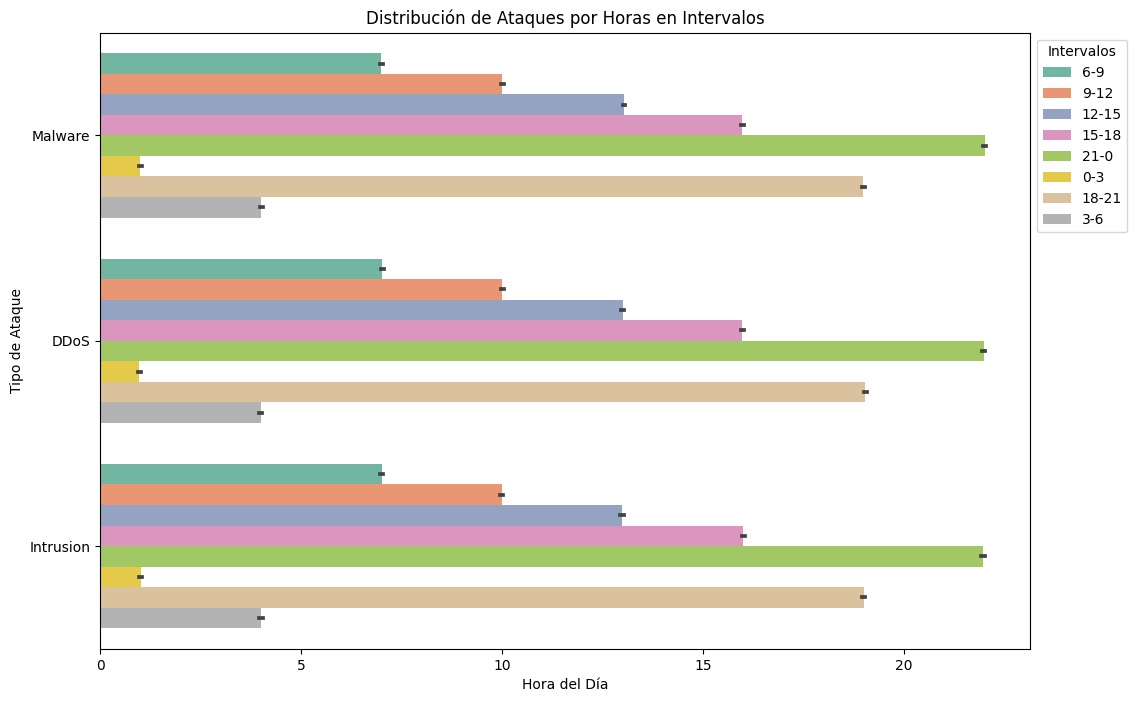

In [40]:

#Crear un bar plot para la distribución de ataques por horas en intervalos
plt.figure(figsize=(12, 8))
sns.barplot(x='Hora_entera', y='Tipo_ataque', hue='Intervalo', data=data, palette='Set2')
plt.title('Distribución de Ataques por Horas en Intervalos')
plt.xlabel('Hora del Día')
plt.ylabel('Tipo de Ataque')
plt.legend(title='Intervalos', bbox_to_anchor=(1, 1))
plt.show()

In [41]:
#F_absolute tipo ataque
F_absoluta_ataque= data.Tipo_ataque.value_counts()
F_relativa_ataque= data.Tipo_ataque.value_counts(normalize=True)*100

#f_relativa turno de ataques
F_absoluta_intervalo= data.Intervalo.value_counts()
F_relativa_intervalo= data.Intervalo.value_counts(normalize=True)*100

#F_absolute conjuntamente
F_absoluta=data.groupby(['Tipo_ataque', 'Intervalo']).size().reset_index(name='Frecuencia Absoluta')

#f_relativa entre T.ataque y Hora
F_relativa = (data.groupby(['Tipo_ataque', 'Intervalo']).size() / len(data)).reset_index(name='Frecuencia Relativa')

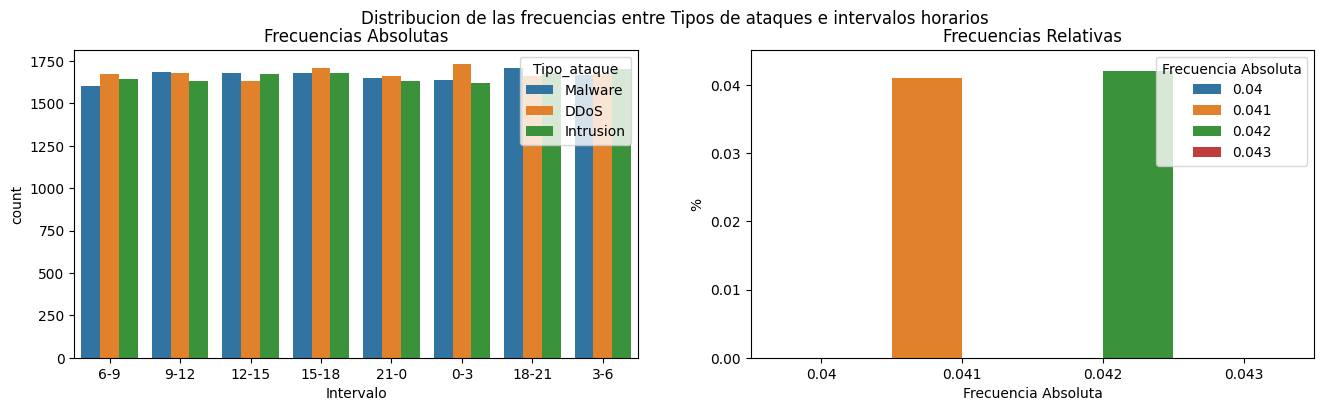

In [42]:
### Creamos figura y axes
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(16,4))# creamos la figura que gusrada los arrays en axs
fig.suptitle("Distribucion de las frecuencias entre Tipos de ataques e intervalos horarios");# suptitle le da titulo a toda la figura 
ax= axs.flatten()

sns.countplot(x = "Intervalo", data = data, ax=axs[0], hue ="Tipo_ataque")# FRECUENCIAS ABOSULTAS 
axs[0].set_title("Frecuencias Absolutas");

#PARA LA FRECUENCIA RELATIVA TENEMOS QUE CALCULARLA ANTES NOSOSTROS
# Calcular la frecuencia relativa
ocurrencias = len(data)
F_relativa = round(F_absoluta['Frecuencia Absoluta'] / ocurrencias, 3)
sns.barplot(x = F_relativa, y = F_relativa, hue = F_relativa, ax = axs[1], width=2)
axs[1].set_title("Frecuencias Relativas")
axs[1].set_ylabel("%");

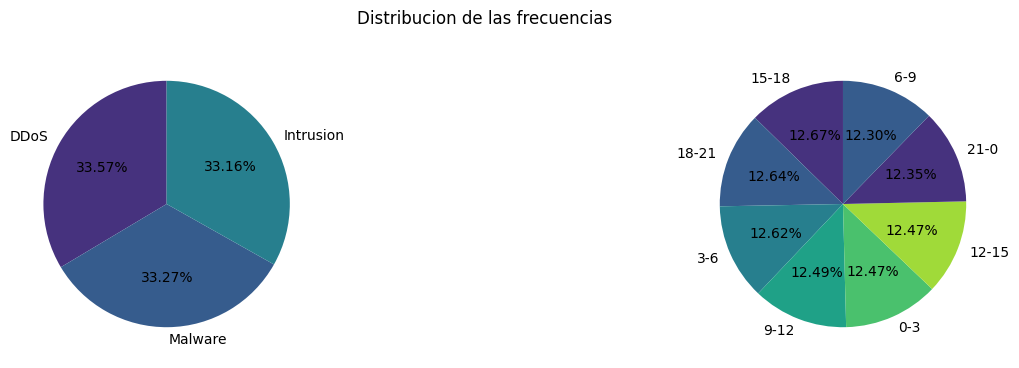

In [43]:
### Creamos figura y axes
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(16,4))# creamos la figura que gusrada los arrays en axs
fig.suptitle("Distribucion de las frecuencias ");# suptitle le da titulo a toda la figura 
data = F_absoluta_ataque

axs[0].pie(data.values,labels=data.index,autopct='%.2f%%', startangle= 90,colors=sns.color_palette('viridis'));

data = F_absoluta_intervalo

axs[1].pie(data.values,labels=data.index,autopct='%.2f%%', startangle= 90,colors=sns.color_palette('viridis'));

In [46]:

data = pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASETS MODIFICADOS\df_modificado_final_eda.xlsx")

In [47]:

#F_absolute
F_absoluta=data.groupby(['Tipo_ataque', 'Intervalo']).size().reset_index(name='Frecuencia Absoluta')

F_absoluta

,Tipo_ataque,Intervalo,Frecuencia Absoluta
0,DDoS,0-3,1730
1,DDoS,12-15,1634
2,DDoS,15-18,1709
3,DDoS,18-21,1663
4,DDoS,21-0,1664
5,DDoS,3-6,1676
6,DDoS,6-9,1674
7,DDoS,9-12,1678
8,Intrusion,0-3,1623
9,Intrusion,12-15,1675


In [50]:
#f_relativa entre T.ataque y Hora
F_relativa = (data.groupby(['Tipo_ataque', 'Intervalo']).size() / len(data)).reset_index(name='Frecuencia Relativa')

F_relativa

,Tipo_ataque,Intervalo,Frecuencia Relativa
0,DDoS,0-3,0.043250
1,DDoS,12-15,0.040850
2,DDoS,15-18,0.042725
3,DDoS,18-21,0.041575
4,DDoS,21-0,0.041600
5,DDoS,3-6,0.041900
6,DDoS,6-9,0.041850
7,DDoS,9-12,0.041950
8,Intrusion,0-3,0.040575
9,Intrusion,12-15,0.041875


# DISTRIBUCIONES CON LOS RESULTADOS  DE LAS IPS DE ORIGEN

In [3]:
df_lugares_origen=pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\EXCEL\geo_lugares_origen_final.xlsx")

In [7]:
df_eda= pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASETS MODIFICADOS\df_modificado_final_eda.xlsx")

In [10]:
df_lugares_origen_2=pd.read_excel(r'E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\EXCEL\ips_origen_2vez_2_filtrado.xlsx')

In [5]:
df_lugares_origen.value_counts()

Longitud   Latitud    Info_Lugar                                                                                                Ciudad                                                         Pais        
26.126606  50.557531  Здолбунівська міська громада, Рівненський район, Óblast de Rivne, Ucrania                                 Здолбунівська, Ucrania                                         Cyprus          1
26.190156  50.545351  Ільпінь, Здолбунівська міська громада, Рівненський район, Óblast de Rivne, 35708, Ucrania                 Ucrania                                                        Saudi Arabia    1
26.217713  50.566080  М-06;Н-25, Здолбунівська міська громада, Рівненський район, Óblast de Rivne, 35702, Ucrania               Здолбунівська, Ucrania                                         Yemen           1
26.230098  50.573701  Великоомелянська сільська громада, Рівненський район, Óblast de Rivne, Ucrania                            Великоомелянська, Ucrania                

In [11]:
df_lugares_origen_2.value_counts()

IP               Latitud      Longitud  
1.221.215.253     50.656568    26.249630    1
38.178.75.53      9.862800     58.993838    1
40.157.7.193      106.705892   10.800369    1
4.93.56.164       45.410777    35.595497    1
4.129.183.139     52.626273    29.562514    1
39.97.159.3      -5.103318     33.539985    1
39.93.105.207     133.979232   33.605866    1
39.79.94.23       51.177126    35.725534    1
39.55.25.208     -93.577139    36.544405    1
39.5.79.40        54.043824    29.129936    1
39.35.164.157     21.899757    55.806442    1
39.250.131.113    133.739062   33.788306    1
39.221.137.159    133.750229   33.551809    1
39.167.122.124    114.852888   4.912330     1
39.137.145.22     23.222275    54.717131    1
39.130.38.82     -77.018204   -11.884209    1
39.116.142.222   -124.055375   49.144742    1
39.11.212.242     54.043560    29.130668    1
38.98.104.255     10.207917    59.135568    1
38.63.47.190      132.760129   33.804822    1
38.6.163.203      50.544372    26.18628

In [6]:
df_lugares_origen.value_counts(normalize=True)*100

Longitud   Latitud    Info_Lugar                                                                                                Ciudad                                                         Pais        
26.126606  50.557531  Здолбунівська міська громада, Рівненський район, Óblast de Rivne, Ucrania                                 Здолбунівська, Ucrania                                         Cyprus          8.333333
26.190156  50.545351  Ільпінь, Здолбунівська міська громада, Рівненський район, Óblast de Rivne, 35708, Ucrania                 Ucrania                                                        Saudi Arabia    8.333333
26.217713  50.566080  М-06;Н-25, Здолбунівська міська громада, Рівненський район, Óblast de Rivne, 35702, Ucrania               Здолбунівська, Ucrania                                         Yemen           8.333333
26.230098  50.573701  Великоомелянська сільська громада, Рівненський район, Óblast de Rivne, Ucrania                            Великоомелянська, Uc

In [12]:
df_lugares_origen_2.value_counts(normalize=True)*100

IP               Latitud      Longitud  
1.221.215.253     50.656568    26.249630    0.070126
38.178.75.53      9.862800     58.993838    0.070126
40.157.7.193      106.705892   10.800369    0.070126
4.93.56.164       45.410777    35.595497    0.070126
4.129.183.139     52.626273    29.562514    0.070126
39.97.159.3      -5.103318     33.539985    0.070126
39.93.105.207     133.979232   33.605866    0.070126
39.79.94.23       51.177126    35.725534    0.070126
39.55.25.208     -93.577139    36.544405    0.070126
39.5.79.40        54.043824    29.129936    0.070126
39.35.164.157     21.899757    55.806442    0.070126
39.250.131.113    133.739062   33.788306    0.070126
39.221.137.159    133.750229   33.551809    0.070126
39.167.122.124    114.852888   4.912330     0.070126
39.137.145.22     23.222275    54.717131    0.070126
39.130.38.82     -77.018204   -11.884209    0.070126
39.116.142.222   -124.055375   49.144742    0.070126
39.11.212.242     54.043560    29.130668    0.070126
38.98

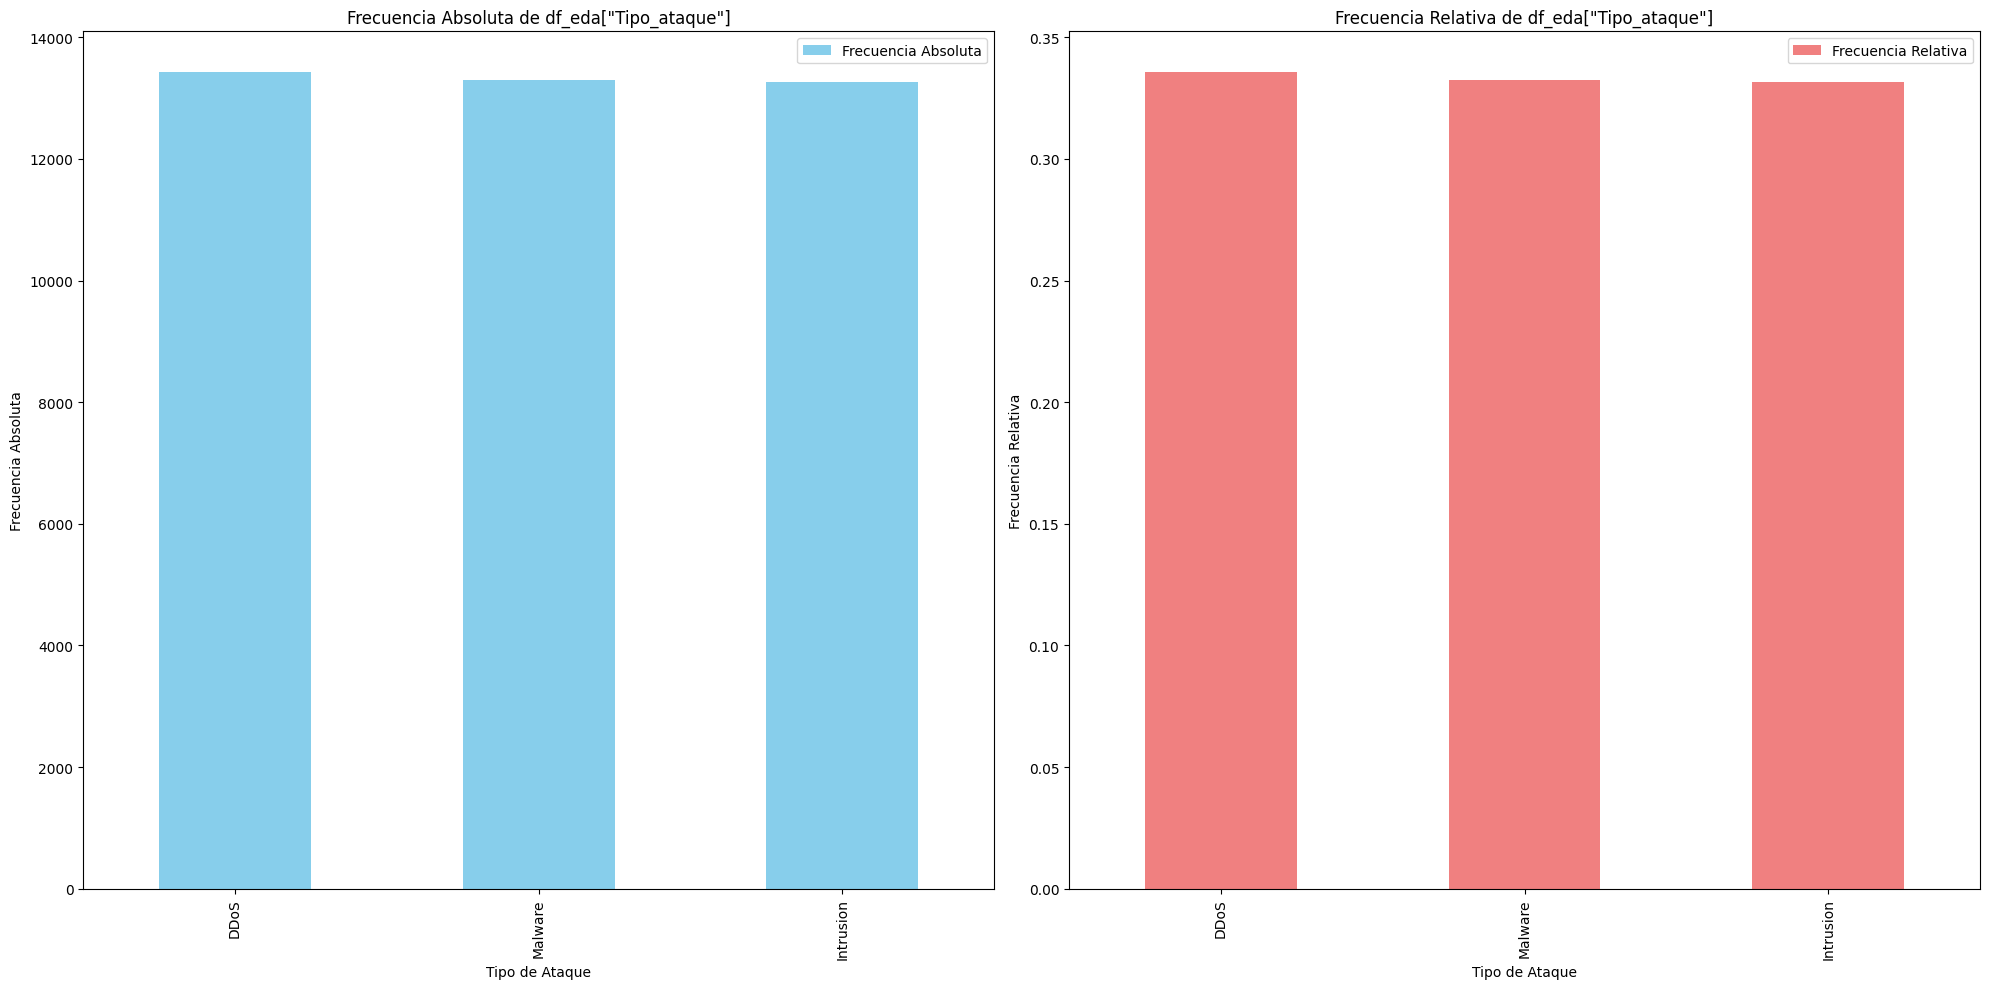

In [13]:
# Configuración de la figura
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))


# Gráfico 3: Frecuencia Absoluta de df_eda['Tipo_ataque']
ax3 = axes[0];
df_eda['Tipo_ataque'].value_counts().plot(kind='bar', ax=ax3, color='skyblue')
ax3.set_title('Frecuencia Absoluta de df_eda["Tipo_ataque"]')
ax3.set_xlabel('Tipo de Ataque')
ax3.set_ylabel('Frecuencia Absoluta')
ax3.legend(['Frecuencia Absoluta'])

# Gráfico 4: Frecuencia Relativa de df_eda['Tipo_ataque']
ax4 = axes[1]
df_eda['Tipo_ataque'].value_counts(normalize=True).plot(kind='bar', ax=ax4, color='lightcoral')
ax4.set_title('Frecuencia Relativa de df_eda["Tipo_ataque"]')
ax4.set_xlabel('Tipo de Ataque')
ax4.set_ylabel('Frecuencia Relativa');
ax4.legend(['Frecuencia Relativa']) 

# Ajustes de diseño de la figura
plt.tight_layout()
plt.show();

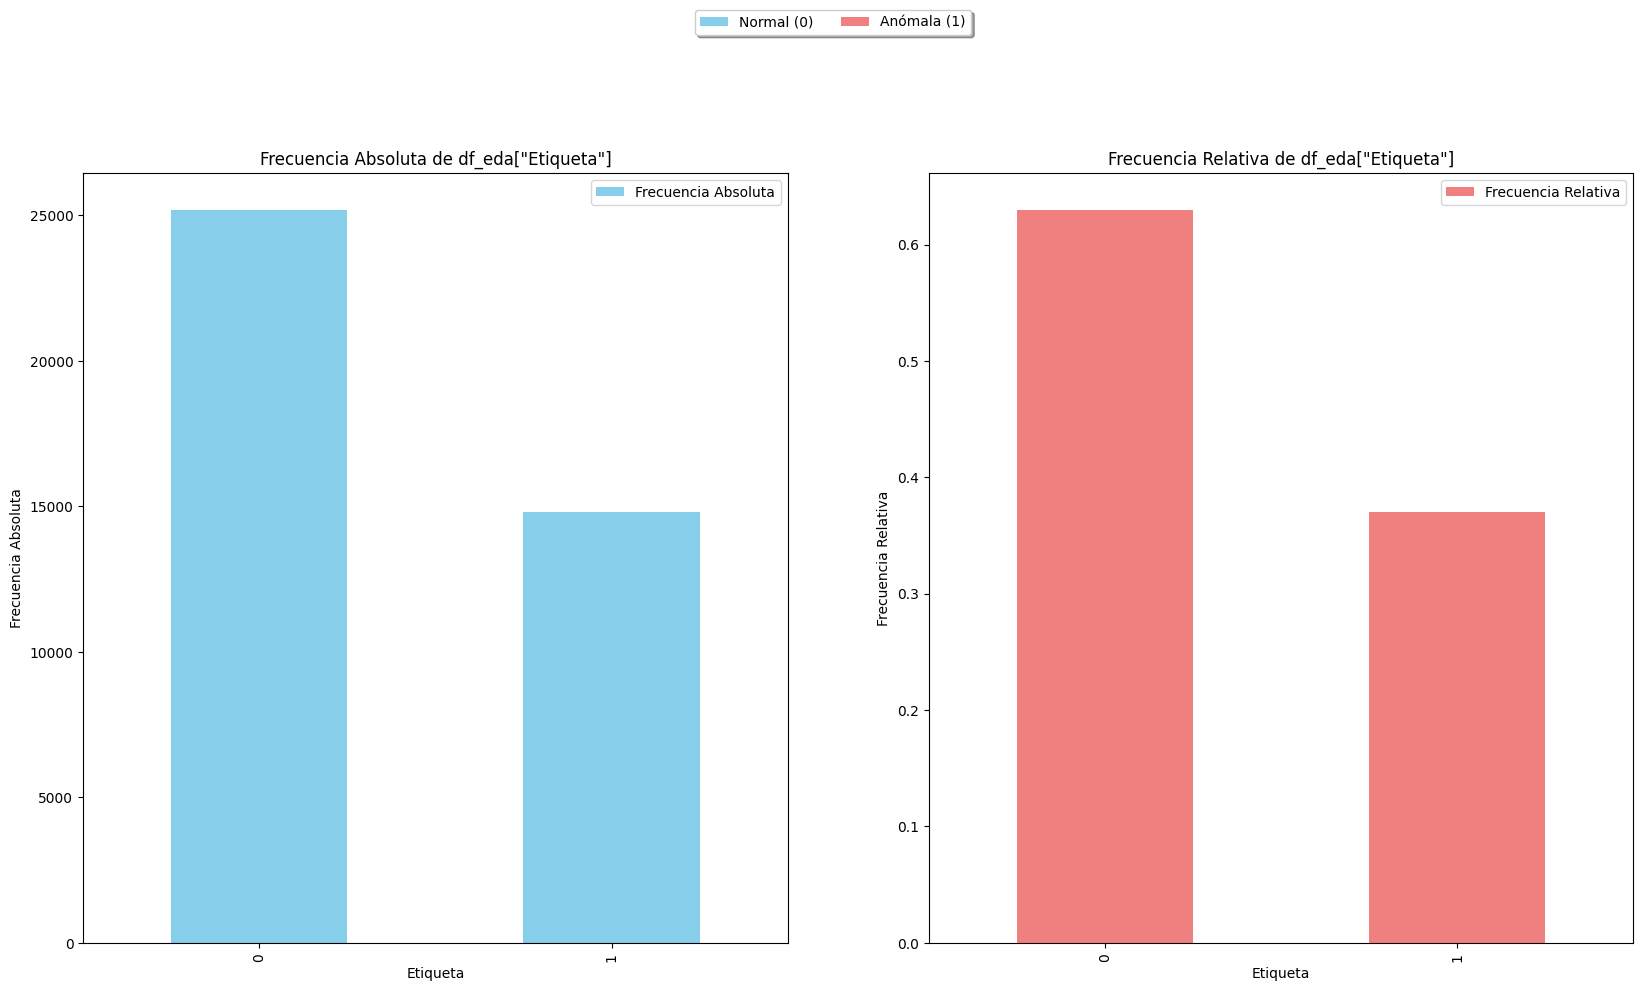

In [14]:
# Configuración de la figura
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
# Gráfico 5: Frecuencia Absoluta de df_eda['Etiqueta']
ax5 = axes[0];
df_eda['Etiqueta'].value_counts().plot(kind='bar', ax=ax5, color='skyblue')
ax5.set_title('Frecuencia Absoluta de df_eda["Etiqueta"]')
ax5.set_xlabel('Etiqueta')
ax5.set_ylabel('Frecuencia Absoluta')
ax5.legend(['Frecuencia Absoluta'])

# Gráfico 6: Frecuencia Relativa de df_eda['Etiqueta']
ax6 = axes[1];
df_eda['Etiqueta'].value_counts(normalize=True).plot(kind='bar', ax=ax6, color='lightcoral')
ax6.set_title('Frecuencia Relativa de df_eda["Etiqueta"]')
ax6.set_xlabel('Etiqueta')
ax6.set_ylabel('Frecuencia Relativa')
ax6.legend(['Frecuencia Relativa'])

# Leyenda explicativa general
fig.legend(['Normal (0)', 'Anómala (1)'], loc='upper center', bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True, ncol=2)

In [ ]:
df_lugares_origen.Ciudad.unique()

FILTRO LAS CIUDADES POR PAISES 

In [15]:
df_pais = pd.read_excel("E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\EXCEL\paises_geo_lugares_origen_final.xlsx")

In [ ]:
# Crea un nuevo dataframe con las columnas de ambos dataframes
#df_lugares_origen_new = pd.concat([df_lugares_origen, df_pais], axis=1)

In [17]:
df_lugares_origen.head(5)

,Longitud,Latitud,Info_Lugar,Ciudad,Pais
0,29.555740,52.658705,"83, Цэнтральная вуліца, Мольча, Чыркавіцкі сел...","Мольча, Чыркавіцкі сельскі Савет, Provincia de...",Belarus
1,35.554545,45.445429,"República Autónoma de Crimea, Ucrania",Ucrania,Turkey
2,26.230098,50.573701,"Великоомелянська сільська громада, Рівненський...","Великоомелянська, Ucrania",Oman
3,26.190156,50.545351,"Ільпінь, Здолбунівська міська громада, Рівненс...",Ucrania,Saudi Arabia
4,53.100078,17.903919,"Dhofar, Omán","Dhofar, Omán",Somalia


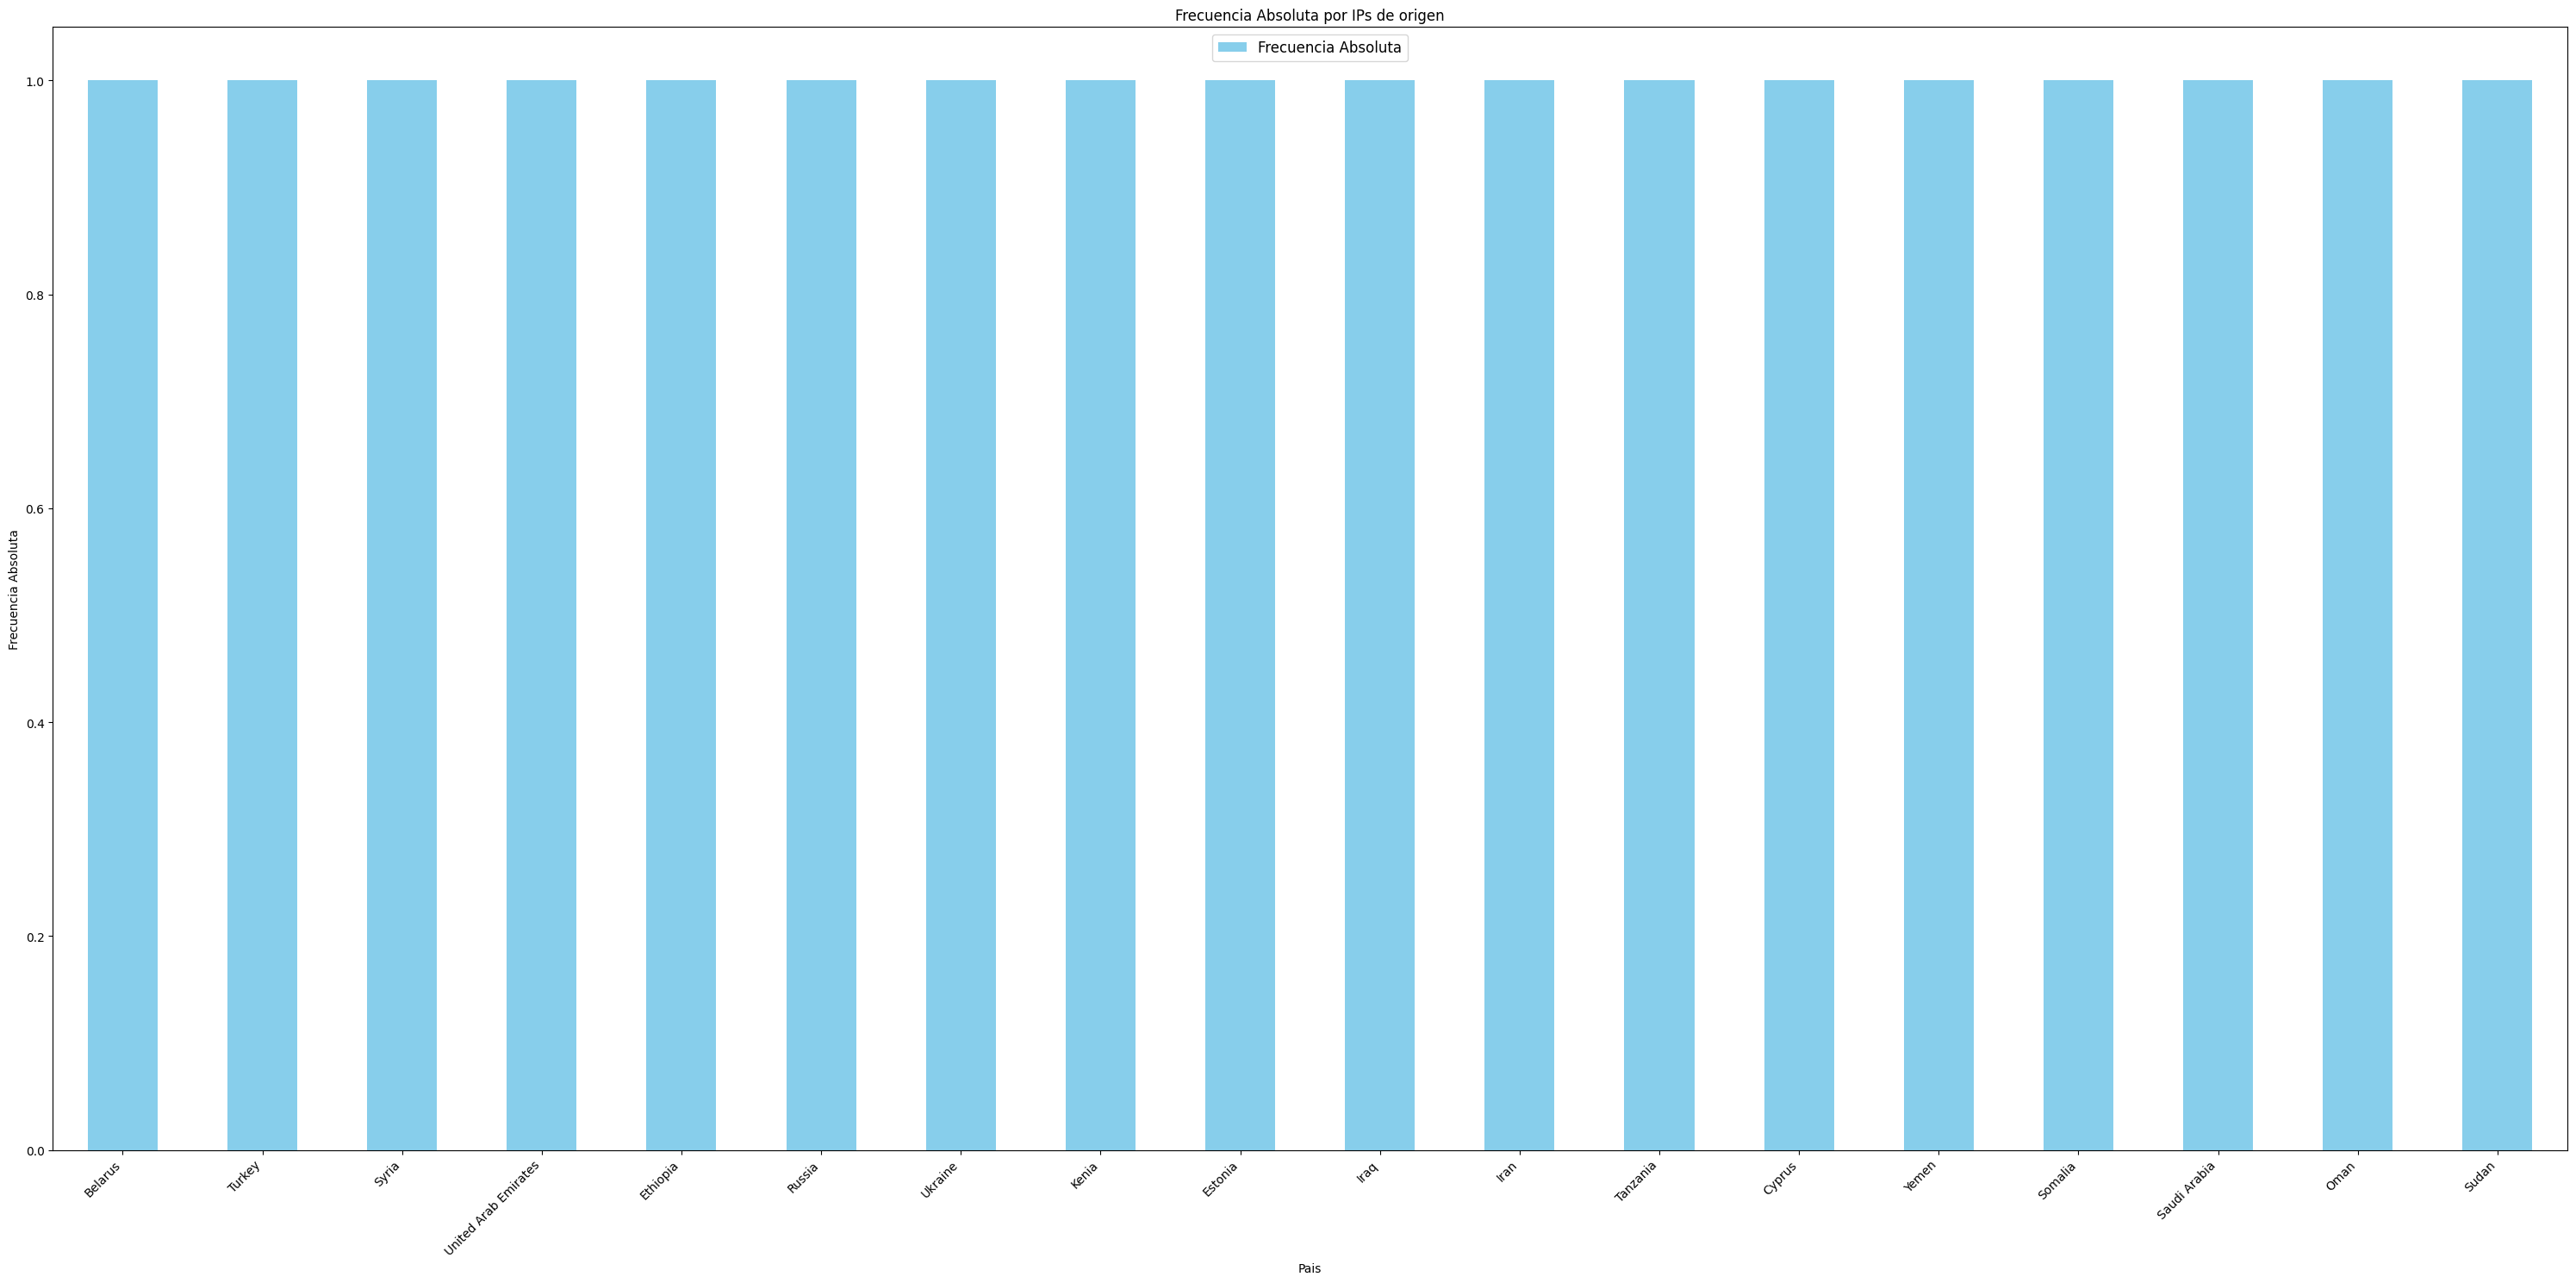

In [18]:
# Configuración de la figura para el Gráfico 1
fig1, ax1 = plt.subplots(figsize=(30, 15))

# Gráfico 1: Frecuencia Absoluta de df_lugares_origen
df_lugares_origen['Pais'].value_counts().plot(kind='bar', ax=ax1, color='skyblue');
ax1.set_title('Frecuencia Absoluta por IPs de origen')
ax1.set_xlabel('Pais')
ax1.set_ylabel('Frecuencia Absoluta');

# Inclinar etiquetas del eje x hacia la derecha
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right');

# Leyenda explicativa
legend_labels = ['Frecuencia Absoluta']
ax1.legend(legend_labels, loc='upper center', fontsize='large')

# Ajustes de diseño de la figura
plt.tight_layout()
plt.show()


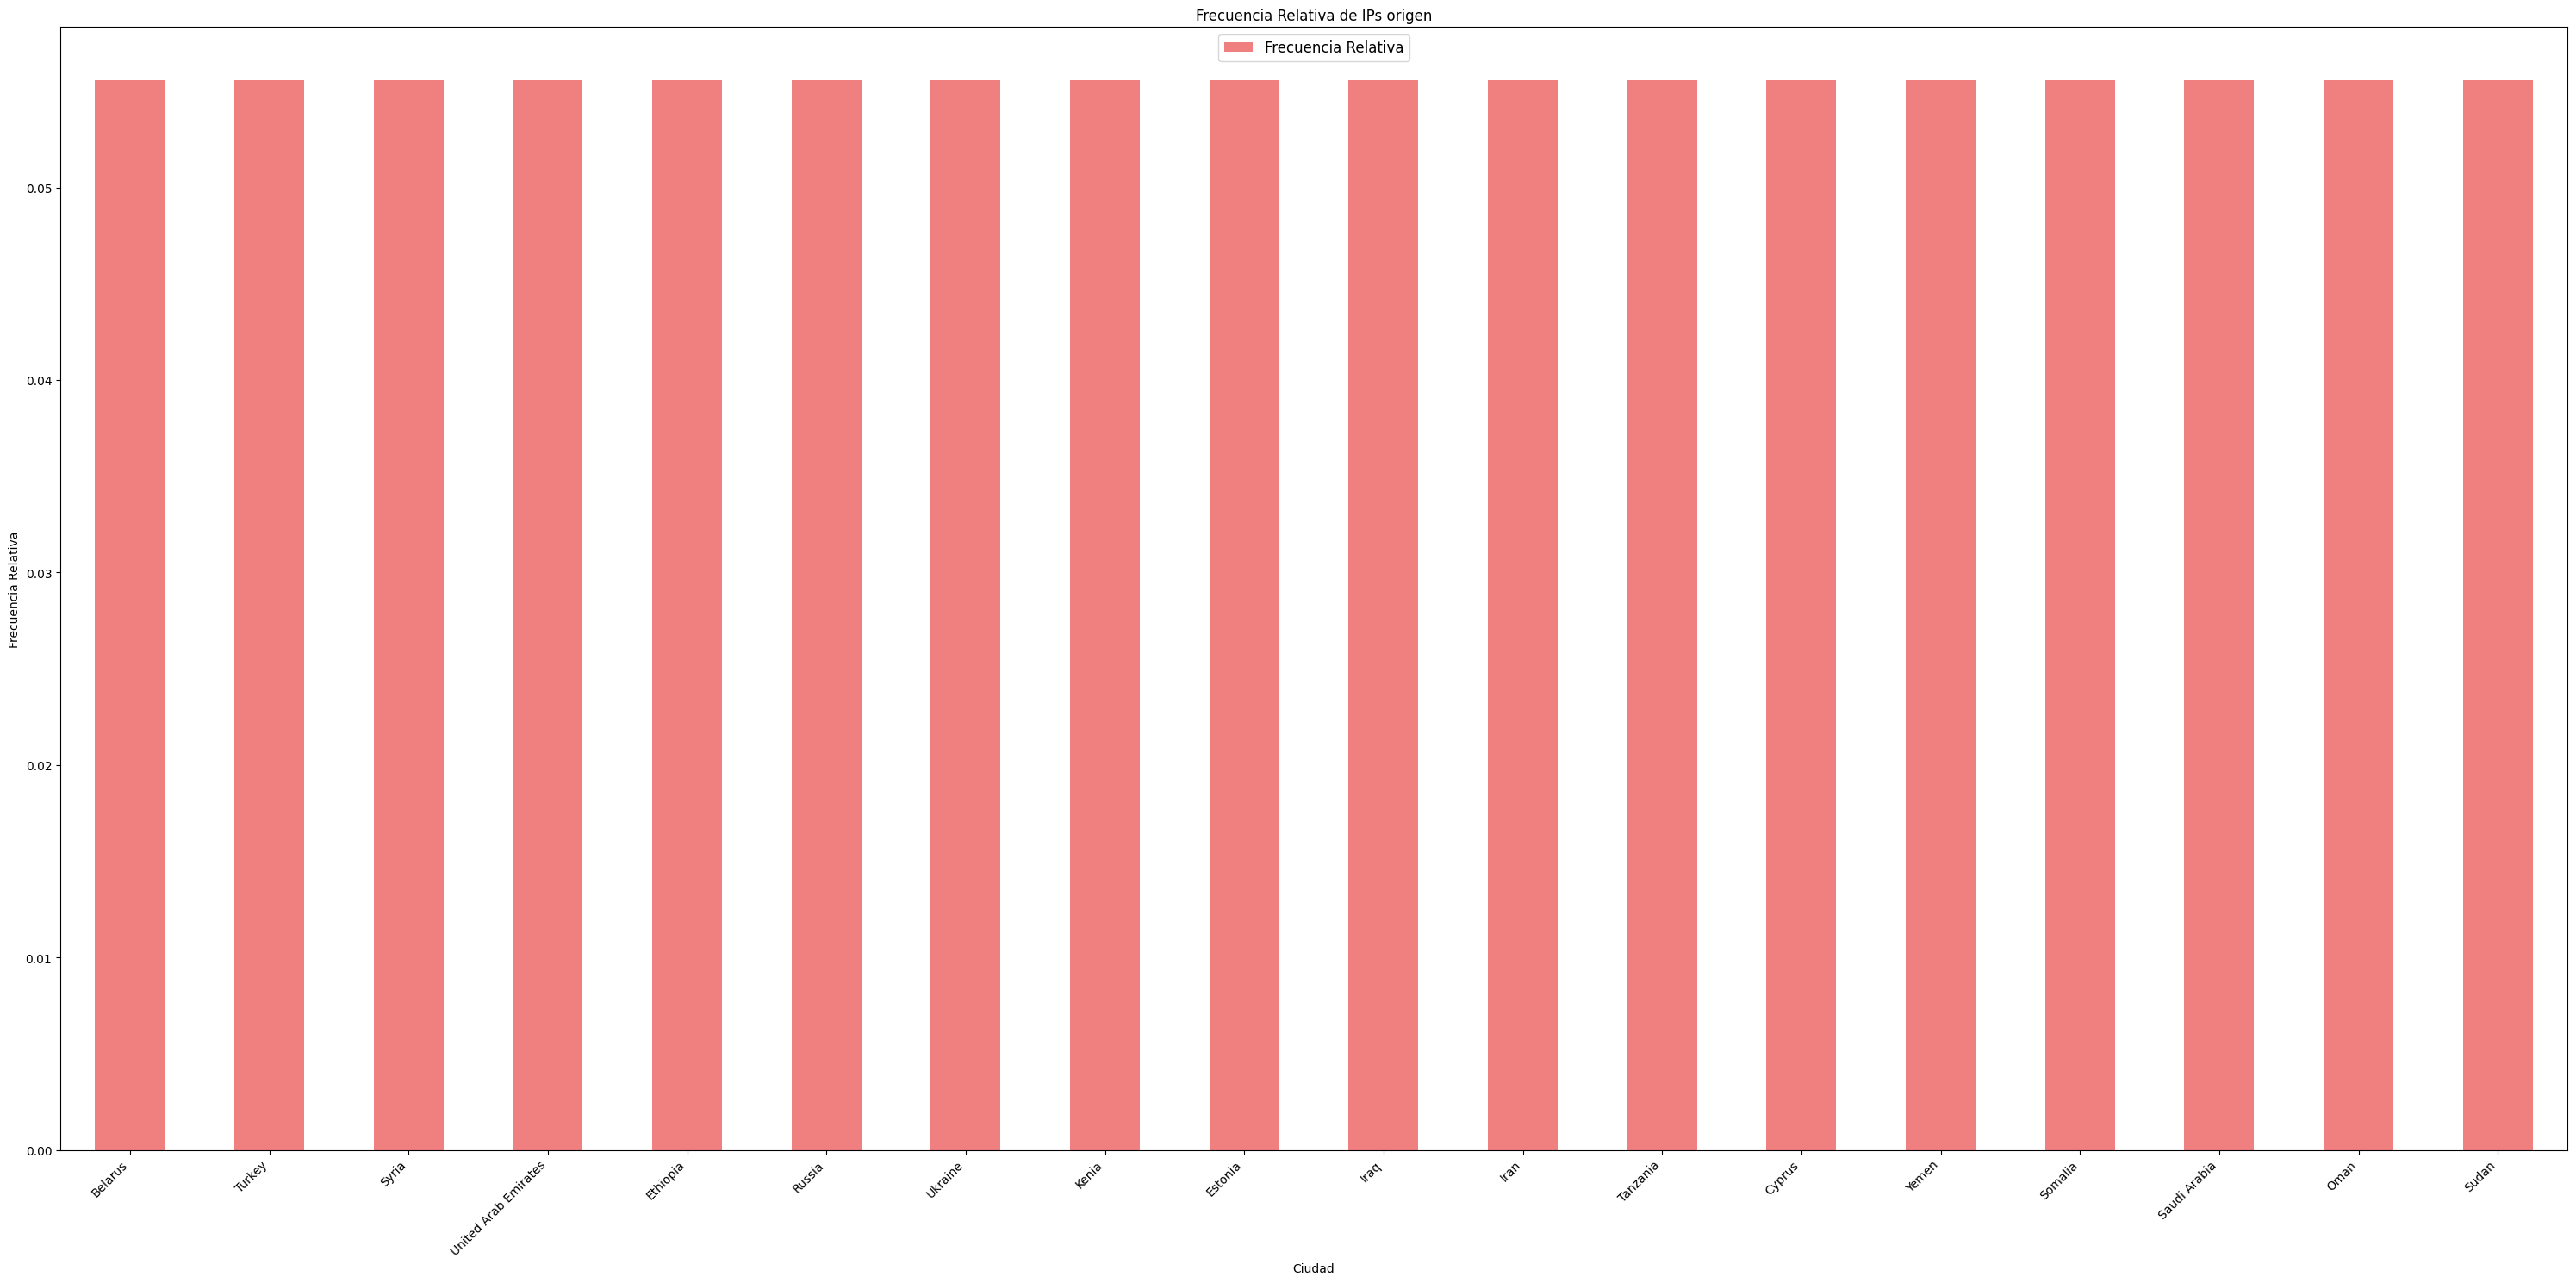

In [19]:
# Configuración de la figura para el Gráfico 2
fig2, ax2 = plt.subplots(figsize=(30, 15))

# Gráfico 2: Frecuencia Relativa de df_lugares_origen
df_lugares_origen['Pais'].value_counts(normalize=True).plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Frecuencia Relativa de IPs origen')
ax2.set_xlabel('Ciudad')
ax2.set_ylabel('Frecuencia Relativa')

# Inclinar etiquetas del eje x hacia la derecha
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Leyenda explicativa
legend_labels = ['Frecuencia Relativa']
ax2.legend(legend_labels, loc='upper center', fontsize='large')

# Ajustes de diseño de la figura
plt.tight_layout()
plt.show()

##### CONVERTIMOS LA ETIQUETA_X EN BINARIA NUMERIA, ASIGNADOLE 1 Y 0 , CREANDO OTRA COLUMNA CON LOS TIPOS DONDE PODREMOS ANOMALA O NORMAL

In [5]:
df_final = pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASETS MODIFICADOS\df_modificado_final_eda.xlsx")

In [ ]:
# Reemplazar 'anómala' con 1 y 'normal' con 0 en la columna 'Etiqueta'
df_final['Etiqueta'] = df_final['Etiqueta'].replace({'normal': 0, 'anómala': 1})

# Crear la nueva columna 'Tipo_etiqueta'
df_final['Tipo_etiqueta'] = df_final['Etiqueta'].map({1: 'anómala', 0: 'normal'})

df_final.head(1)

In [6]:
df_final.head(1)

,Anyo,Fecha,Hora,Hora_entera,Intervalo,IP Origen,Destino IP,Datos_geolocalizacion,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Cluster,Etiqueta,Indicadores_malware,Puntuaciones_anomalias,Informacion_usuario,Informacion_dispositivo,Tipo_etiqueta
0,2023,2023-05-30,2023-12-25 06:33:58,6,6-9,103.216.15.12,84.9.164.252,"Jamshedpur, Sikkim",Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",0.067699,1,IoC Detected,2867,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,anómala
